In [1]:
# Import necessary libraries

import os
import pandas as pd

# Plot Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Library
import scipy.stats as stats

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:

# Define the path to the directory containing CSV files
pathAddress = "/Users/hooman/Work Space/Online Store Data Analysis/online_store_data_analysis/notebooks/Exported CSV Files"

# List all files in the directory
dirList = os.listdir(pathAddress)

# Remove the ".csv" extension from each file name
for i in range(len(dirList)):
    dirList[i] = dirList[i].replace(".csv", "")

# Read each CSV file into a DataFrame and store it in a global variable
for i in dirList:
    globals()[i] = pd.read_csv(pathAddress + "/" + i + ".csv").drop("Unnamed: 0", axis=1, errors='ignore')

# Uncomment the following block if you want to print the variable names and file names
'''
# Read Table and Create Dataframe using zip function

# Path of file and read name of table
path = "/Users/hooman/Work Space/Online Store Data Analysis/online_store_data_analysis/notebooks/Exported CSV Files"
dir_list = os.listdir(path)

# Read Table and Create Dataframe using zip function
variable_names = dir_list.copy()
for i in range(len(variable_names)):
    variable_names[i] = variable_names[i].replace(".csv", "")

file_names = dir_list

for var_name, file_name in zip(variable_names, file_names):
    print(f"name {var_name}    and file {var_name}")
    globals()[var_name] = pd.read_csv(f'/Users/hooman/Work Space/Online Store Data Analysis/online_store_data_analysis/notebooks/Exported CSV Files/{file_name}').drop("Unnamed: 0", axis=1, errors='ignore')
'''

'\n# Read Table and Create Dataframe using zip function\n\n# Path of file and read name of table\npath = "/Users/hooman/Work Space/Online Store Data Analysis/online_store_data_analysis/notebooks/Exported CSV Files"\ndir_list = os.listdir(path)\n\n# Read Table and Create Dataframe using zip function\nvariable_names = dir_list.copy()\nfor i in range(len(variable_names)):\n    variable_names[i] = variable_names[i].replace(".csv", "")\n\nfile_names = dir_list\n\nfor var_name, file_name in zip(variable_names, file_names):\n    print(f"name {var_name}    and file {var_name}")\n    globals()[var_name] = pd.read_csv(f\'/Users/hooman/Work Space/Online Store Data Analysis/online_store_data_analysis/notebooks/Exported CSV Files/{file_name}\').drop("Unnamed: 0", axis=1, errors=\'ignore\')\n'

In [ ]:
# Task 6
# Display information about the 'customers' DataFrame
customers.info()

# Display descriptive statistics for the 'creditLimit' column in the 'customers' DataFrame
customers["creditLimit"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerNumber          122 non-null    int64  
 1   customerName            122 non-null    object 
 2   contactLastName         122 non-null    object 
 3   contactFirstName        122 non-null    object 
 4   phone                   122 non-null    object 
 5   addressLine1            122 non-null    object 
 6   addressLine2            22 non-null     object 
 7   city                    122 non-null    object 
 8   state                   49 non-null     object 
 9   postalCode              115 non-null    object 
 10  country                 122 non-null    object 
 11  salesRepEmployeeNumber  100 non-null    float64
 12  creditLimit             122 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 12.5+ KB


count       122.000000
mean      67659.016393
std       45043.370751
min           0.000000
25%       42175.000000
50%       76700.000000
75%       95075.000000
max      227600.000000
Name: creditLimit, dtype: float64

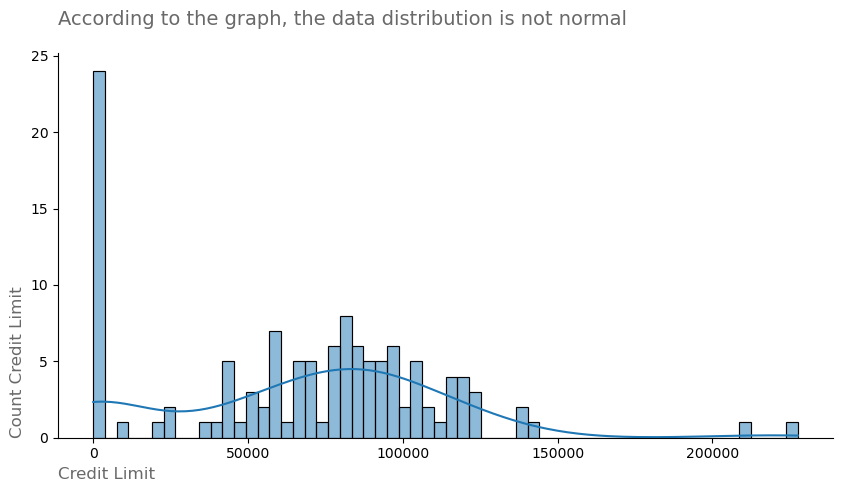

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(1)

# Set the size of the figure
fig.set_size_inches(10, 5)

# Create a histogram with seaborn
ax = sns.histplot(data=customers, x="creditLimit", bins=60, kde=True)

# Set the title and labels
ax.set_title("According to the graph, the data distribution is not normal", fontsize=14, loc='left', pad=20, color='dimgray')
ax.set_xlabel("Credit Limit", fontsize=12, loc='left', color='dimgray')
ax.set_ylabel("Count Credit Limit", fontsize=12, loc='bottom', color='dimgray')

# Remove the top and right spines
ax.spines[["top", "right"]].set_visible(False)

# Display the plot
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


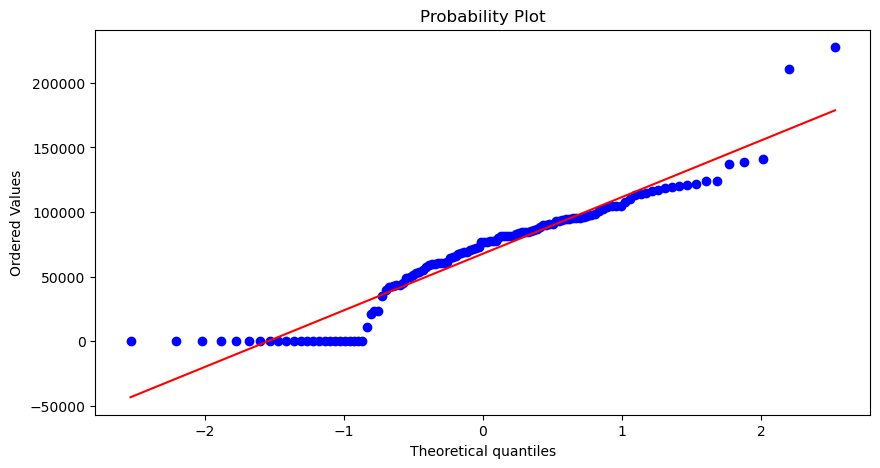

Uniform Distribution: Points deviate from the line, especially at the ends, as a uniform distribution has no tails.


In [ ]:
# QQ plot
# Create a figure and axis
fig, ax = plt.subplots(1)

# Set the size of the figure
fig.set_size_inches(10, 5)

# Generate a QQ plot to compare the distribution of 'creditLimit' with a normal distribution
ax = stats.probplot(customers["creditLimit"], dist="norm", fit=True, plot=plt)

# Display the plot
plt.show()

# Print interpretation of the QQ plot
print("Uniform Distribution: Points deviate from the line, especially at the ends, as a uniform distribution has no tails.")

Shapiro Test
Statistics:  0.9239340032363458 P-Value:  3.4790597218038806e-06
Data is NOT normal
- - - - - - 
Lambda:  0.36771521684937
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


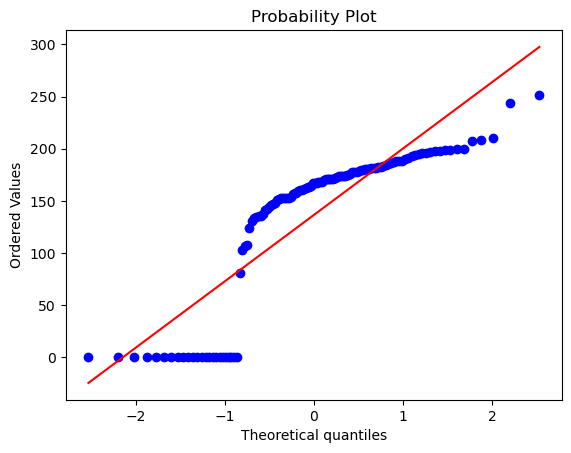

Shapiro Test from transformed_data
Statistics:  0.7576955254536759 P-Value:  6.562235736155268e-13
Data is NOT Normal


In [ ]:
# Shapiro Test to check normality of 'creditLimit' data
print("Shapiro Test")
stat, p = stats.shapiro(customers['creditLimit'])
print("Statistics: ", stat, "P-Value: ", p)
if p > 0.05:
    print("Data is Normal")
else:
    print("Data is NOT normal")

print("- - - - - - ")

# Apply Box-Cox transformation to 'creditLimit' data to make it more normally distributed
transformed_data, lambda_opt = stats.boxcox(customers['creditLimit'] + 1)  # Adding 1 to avoid zero values
print("Lambda: ", lambda_opt)

# Generate a QQ plot for the transformed data
stats.probplot(transformed_data, fit=True, plot=plt)
plt.show()

# Shapiro Test to check normality of the transformed data
print("Shapiro Test from transformed_data")
stat, p = stats.shapiro(transformed_data)
print("Statistics: ", stat, "P-Value: ", p)
if p > 0.05:
    print("Data is Normal")
else:
    print("Data is NOT Normal")